サンプルデータは下記Wikipediaより  
https://ja.wikipedia.org/wiki/YouTuber  
stopwordはここから拝借  
http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt

In [1]:
from utils import io_utils

text = 'YouTuber（ユーチューバー）・YouTubeクリエイターは、主にYouTube上で独自に制作した動画を継続的に公開する人物を指す名称である。\
狭義では「YouTubeの動画再生によって得られる広告収入を主な収入源として生活する」人物を指す[1]。 \
英語圏では「YouTuber[2][3]」以外に「YouTube personality」「YouTube Star[4]」「YouTube Celebrity[5]」などの表記も使われる。\
子供の将来就きたい職業として人気が高く、2018年現在、日本では小学4年生の『なりたい職業ランキング』3位にランクされ、\
イギリスでは3人に1人の子供の憧れの職業になっている[6]。'

path_stop_words = '../stop_words.txt'
stop_words = io_utils.read_txt(path_stop_words)

In [2]:
from utils.preprocess import clean, tokenize

# preprocess
pre_text = clean.clean_text(text, _normalize=False, upper=False, lower=False, drop_kigou=u'[()（）「」『』\[\]]')

# tokenize
list_white_poc = ['動詞', '名詞']
path_dict = '/usr/lib/mecab/dic/mecab-ipadic-neologd/'
tkn = tokenize.Tokenize(list_white_poc=list_white_poc, stop_words=stop_words, path_dict=path_dict)
list_words = tkn.tokenize_text(pre_text)

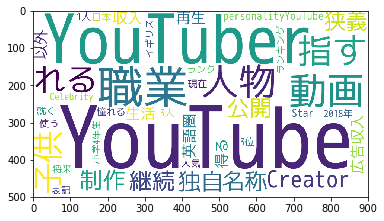

In [3]:
%matplotlib inline
# wordcloud
from base_analysis import wordcloud

wordcloud.save_wordcloud(list_words, './test.png')

In [5]:
from base_analysis import stats
df_word_cnt = stats.word_count(list_words)
df_word_cnt.head()

,word,cnt
0,YouTube,5
1,職業,3
2,YouTuber,3
3,主,2
4,動画,2
